In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from sko.GA import GA_TSP
import pandas as pd
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
import math
import pathlib, os
import time

In [3]:
def polygonVerticesadvanced(numPoints, radius, centerX, centerY):
    vertices = []
    xcoordinate = []
    ycoordinate = []
    for i in range(numPoints):
        crtAngle=math.pi/numPoints + (i) * (2*math.pi)/(numPoints)
        xcoordinate.append(radius*math.cos(crtAngle))
        ycoordinate.append(radius*math.sin(crtAngle))
    vertices = list(zip(
        [x + centerX for x in xcoordinate]
        , [x + centerY for x in ycoordinate]))
   
    return vertices


n_sites = 4
fire_sites = np.array(polygonVerticesadvanced(n_sites,1,0,0))
distance_matrix = spatial.distance.cdist(fire_sites, fire_sites, metric='euclidean')

fire_sites
distance_matrix

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

array([[0.        , 1.41421356, 2.        , 1.41421356],
       [1.41421356, 0.        , 1.41421356, 2.        ],
       [2.        , 1.41421356, 0.        , 1.41421356],
       [1.41421356, 2.        , 1.41421356, 0.        ]])

In [4]:
def cal_total_distance(route):
    n_sites, = route.shape
    return sum([distance_matrix[route[i % n_sites], route[((i + 1) % n_sites)]] for i in range(n_sites)])


In [5]:
pop_size =10
n_gen = 100

ga_tsp = GA_TSP(func=cal_total_distance, n_dim=n_sites, size_pop= pop_size, max_iter=n_gen, prob_mut=1)
opt_solution, _ = ga_tsp.run()
opt_solution

array([0, 1, 2, 3])

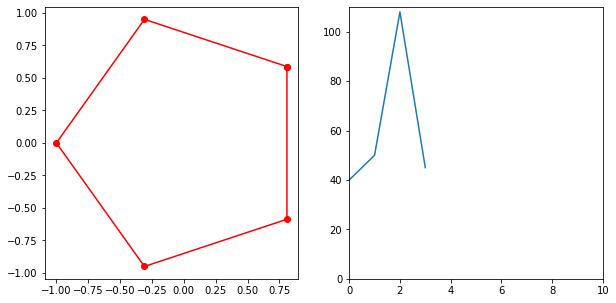

In [6]:

def plot_solution(solution, sites, costFunctionhistory, n_gens, ylimmax = 125, filename = ''):
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    roundtripsolution = np.concatenate([solution, [solution[0]]])
    sol_sites_coordinates = sites[roundtripsolution, :]
    ax[0].plot(sol_sites_coordinates[:, 0], sol_sites_coordinates[:, 1], 'o-r')
    ax[1].plot(costFunctionhistory)
    plt.ylim(0,ylimmax)
    plt.xlim(0,n_gens)
    plt.show()
    if not(filename == ""):
        fig.savefig(filename,bbox_inches='tight', dpi=150)

#testing
n_sites =5
n_gens = 10
fire_sites = np.array(polygonVerticesadvanced(n_sites,1,0,0))
os.makedirs('./tmp/', exist_ok = True)

crtfg=plot_solution([i for i in range(n_sites)]
              , fire_sites
              , np.array([40,50,108,45])
              , n_gens
              , ylimmax = 110      
              ,filename='./tmp/test0000.jpg')

In [7]:
def demo_function(sites, n_sites, pop_size, total_n_gens, step_n_gens, longcostFunctionarray, filePrefix = ''):
    for crt_n_gen in range (20, total_n_gens, step_n_gens):
        crt_optimizer=GA_TSP(func=cal_total_distance, n_dim=n_sites, size_pop= pop_size, max_iter=crt_n_gen, prob_mut=1)
        crt_best_solution, best_distance = crt_optimizer.run()
        picfname = (f"{filePrefix}myplot{crt_n_gen:03d}.jpg")
        plot_solution(crt_best_solution,sites, longcostFunctionarray[0:crt_n_gen], total_n_gens,filename=picfname)


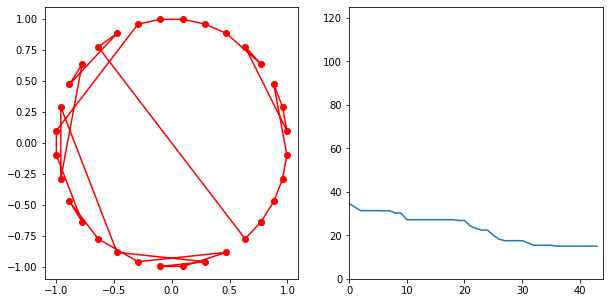

In [8]:
if True:
    N_SITES = 32
    POP_SIZE =10
    N_GENS = 44
    fire_sites = np.array(polygonVerticesadvanced(N_SITES,1,0,0))
    distance_matrix = spatial.distance.cdist(fire_sites, fire_sites, metric='euclidean')
    long_optimizer = GA_TSP(func=cal_total_distance, n_dim=N_SITES, size_pop= POP_SIZE, max_iter=N_GENS, prob_mut=1)
    opt_solution, aaa = long_optimizer.run()
    tot_dist_calc_opt = cal_total_distance(opt_solution)
    # true_optimum_solution = np.array([*range(N_SITES)])
    # tot_dist_true_opt = cal_total_distance(true_optimum_solution)
    plot_solution(opt_solution, fire_sites, long_optimizer.generation_best_Y, N_GENS)

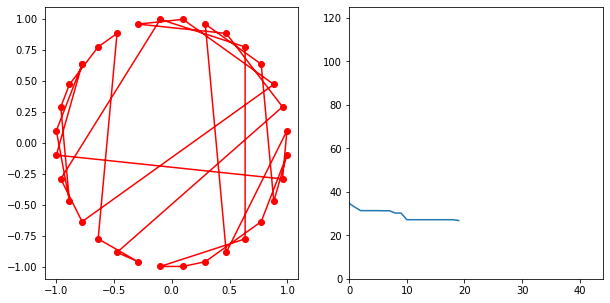

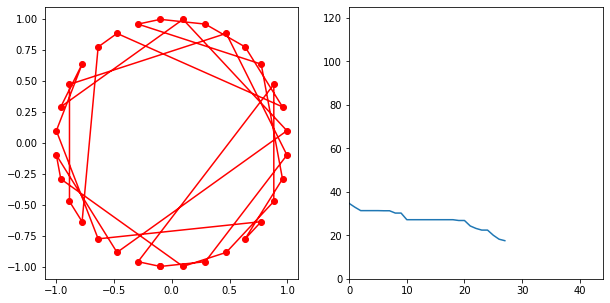

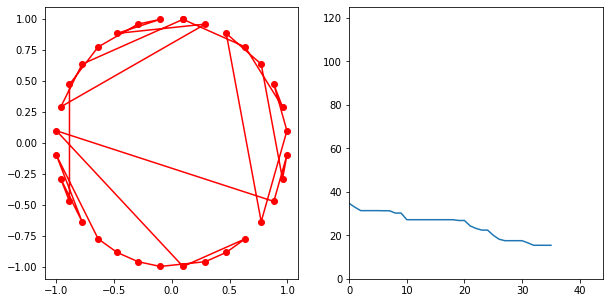

In [9]:
if True:
    STEP_N_GENS = 8
    os.makedirs('./demo_output/', exist_ok = True)
    target_file_path = './demo_output/'
    
    opt_solution_cost_function_array=long_optimizer.generation_best_Y
    demo_function(fire_sites, N_SITES, POP_SIZE, N_GENS, STEP_N_GENS, opt_solution_cost_function_array, target_file_path)

In [10]:
distance_matrix = spatial.distance.cdist(np.array(polygonVerticesadvanced(2,1,0,0))
                                         , np.array(polygonVerticesadvanced(2,1,0,0))
                                         , metric='euclidean')

def benchmark_function(benchmark_sites_list, benchmark_gens_list, pop_size):
    global distance_matrix
    cost_func = np.empty((len(benchmark_sites_list),len(benchmark_gens_list)))
    cost_func[:] = np.nan
    opt_cost_func = np.empty((len(benchmark_sites_list),len(benchmark_gens_list)))
    opt_cost_func[:]=np.nan
    opt_time = np.empty((len(benchmark_sites_list),len(benchmark_gens_list)))
    opt_time[:]=np.nan
    distance_matrix = spatial.distance.cdist(np.array(polygonVerticesadvanced(2,1,0,0))
                                             , np.array(polygonVerticesadvanced(2,1,0,0))
                                             , metric='euclidean')
    for crt_site_index in [*range(len(benchmark_sites_list))]:
        crt_site =  benchmark_sites_list[crt_site_index]
        true_optimum_solution = np.array([*range(crt_site)])
        fire_sites = np.array(polygonVerticesadvanced(crt_site,1,0,0))
        distance_matrix = spatial.distance.cdist(fire_sites, fire_sites, metric='euclidean')
        print(distance_matrix.shape, len(true_optimum_solution))
        crt_true_optimum_cost = cal_total_distance(true_optimum_solution)
        for crt_gen_index in [*range(len(benchmark_gens_list))]:
            crt_gen = benchmark_gens_list[crt_gen_index]
            print("Below is the information for site number " + str(crt_site) + " at " + str(crt_gen) + " generations")
            start_time = time.time()
            long_optimizer = GA_TSP(func=cal_total_distance, n_dim=crt_site, size_pop= pop_size, max_iter=crt_gen, prob_mut=1)
            opt_solution, aaa = long_optimizer.run()
            opt_time[crt_site_index, crt_gen_index]=time.time() - start_time
            cost_func[crt_site_index, crt_gen_index]=cal_total_distance(opt_solution)
            opt_cost_func[crt_site_index, crt_gen_index]=crt_true_optimum_cost
            print("The cost function is " + str("{:.2f}".format(cal_total_distance(opt_solution))) 
                  + " at " 
                  + str(crt_site) 
                  + " sites and at " 
                  + str(crt_gen) 
                  + " gens.")
            np.savetxt('calculated_cost.csv', cost_func, delimiter=',', fmt='%.4f')
            np.savetxt('true_optimum_cost.csv', opt_cost_func, delimiter=',', fmt='%.4f')
            np.savetxt('time_it_takes_to_calculate_cost.csv', opt_time, delimiter=',', fmt='%.4f')
            plot_solution(opt_solution
                          , fire_sites
                          , long_optimizer.generation_best_Y
                          , crt_gen
                          , filename=f"./benchmark_function_pics/(NGenIdx{crt_gen_index}_NSiteIdx{crt_site_index}).jpg")
          
    return cost_func, opt_cost_func, opt_time

[10, 20, 30]

[50, 100]

(10, 10) 10
Below is the information for site number 10 at 50 generations
The cost function is 6.18 at 10 sites and at 50 gens.


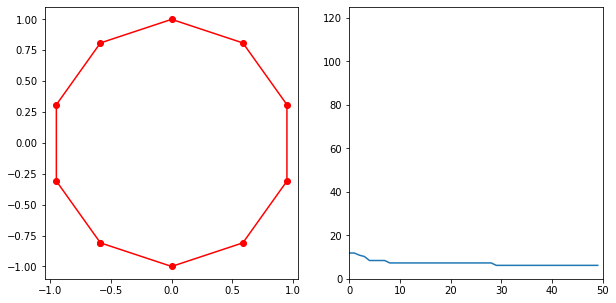

Below is the information for site number 10 at 100 generations
The cost function is 6.18 at 10 sites and at 100 gens.


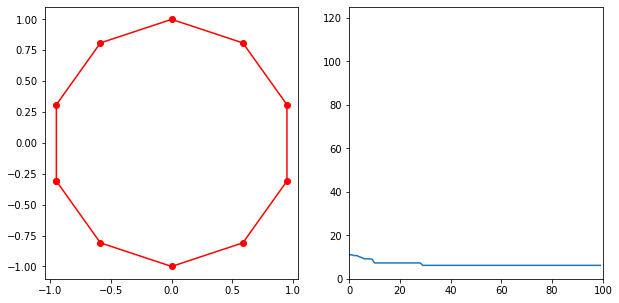

(20, 20) 20
Below is the information for site number 20 at 50 generations
The cost function is 10.71 at 20 sites and at 50 gens.


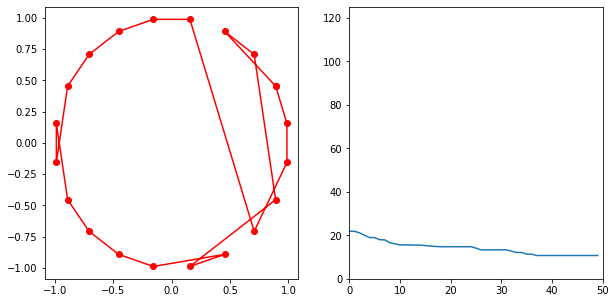

Below is the information for site number 20 at 100 generations
The cost function is 6.26 at 20 sites and at 100 gens.


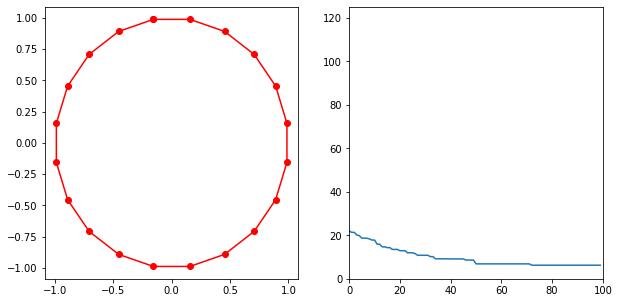

(30, 30) 30
Below is the information for site number 30 at 50 generations
The cost function is 15.79 at 30 sites and at 50 gens.


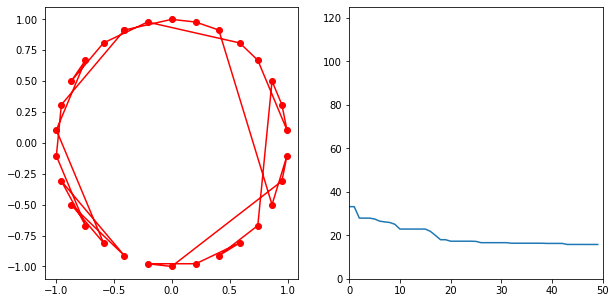

Below is the information for site number 30 at 100 generations
The cost function is 12.84 at 30 sites and at 100 gens.


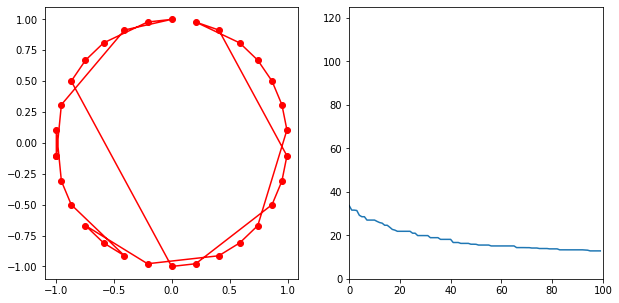

(array([[ 6.18033989,  6.18033989],
        [10.71016166,  6.2573786 ],
        [15.78973263, 12.8352278 ]]),
 array([[6.18033989, 6.18033989],
        [6.2573786 , 6.2573786 ],
        [6.2717078 , 6.2717078 ]]),
 array([[0.04816031, 0.08308148],
        [0.05035543, 0.09951854],
        [0.06506276, 0.13058925]]))

In [11]:
os.makedirs('./benchmark_function_pics/', exist_ok = True)

benchmark_sites_list = [10, 20, 30]
benchmark_gens_list = [50, 100] 

benchmark_sites_list
benchmark_gens_list

benchmark_function(benchmark_sites_list, benchmark_gens_list, POP_SIZE)

In [12]:
def get_list_of_images(range_list_gens, range_list_sites, prefix, postfix):
    aa=[f"{prefix}(NGenIdx{crt_gen}_NSiteIdx{crt_site}){postfix}" for crt_gen in range_list_gens for crt_site in range_list_sites]
    return aa
  
    
generations_list = [1]
sites_list = [*range(0, len(benchmark_sites_list), 1)]
images_list = get_list_of_images(generations_list,sites_list,'./benchmark_function_pics/', '.jpg')
images_list

['./benchmark_function_pics/(NGenIdx1_NSiteIdx0).jpg',
 './benchmark_function_pics/(NGenIdx1_NSiteIdx1).jpg',
 './benchmark_function_pics/(NGenIdx1_NSiteIdx2).jpg']

In [13]:
#benchmark GIF
from PIL import Image
def make_gif(list_of_images, gif_name):
    frames = [Image.open(image) for image in list_of_images]
    frame_one = frames[0]
    frame_one.save(f"{gif_name}.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)
    

make_gif(images_list, './benchmark_function_pics/testingbenchmark')

In [14]:
true_opt_file_name='true_optimum_cost.csv'
true_opt_path= pathlib.Path('.') / true_opt_file_name
true_opt_csv = pd.read_csv(str(true_opt_path), index_col=False, header=None)
true_opt_array=np.array(true_opt_csv)
print("This is the array of the true optimum path length: ")
print(true_opt_array)

calc_cost_file_name='calculated_cost.csv'
calc_cost_path= pathlib.Path('.') / calc_cost_file_name
calc_cost_csv = pd.read_csv(str(calc_cost_path), index_col=False, header=None)
calc_cost_array=np.array(calc_cost_csv)
print("This is the array of the optimum path lengths the GA found: ")
print(calc_cost_array)

time_to_calc_cost_file_name='time_it_takes_to_calculate_cost.csv'
time_to_calc_path= pathlib.Path('.') / time_to_calc_cost_file_name
time_to_calc_csv = pd.read_csv(str(time_to_calc_path), index_col=False, header=None)
time_to_calc_array=np.array(time_to_calc_csv)
print("This is the array of how much time it took for the optimum path lengths the GA found to be calculated (in seconds): ")
print(time_to_calc_array)

true_vs_calc_opt_ratio_array = calc_cost_array / true_opt_array
true_vs_calc_opt_ratio_array

This is the array of the true optimum path length: 
[[6.1803 6.1803]
 [6.2574 6.2574]
 [6.2717 6.2717]]
This is the array of the optimum path lengths the GA found: 
[[ 6.1803  6.1803]
 [10.7102  6.2574]
 [15.7897 12.8352]]
This is the array of how much time it took for the optimum path lengths the GA found to be calculated (in seconds): 
[[0.0482 0.0831]
 [0.0504 0.0995]
 [0.0651 0.1306]]


array([[1.        , 1.        ],
       [1.71160546, 1.        ],
       [2.51761086, 2.04652646]])

In [15]:
x=pd.DataFrame(true_vs_calc_opt_ratio_array, columns=[i for i in benchmark_gens_list], index=[i for i in benchmark_sites_list])
x=x.style.background_gradient(cmap='YlOrRd')
display(x)

benchmark_sites_list
benchmark_gens_list

,50,100
10,1.000000,1.000000
20,1.711605,1.000000
30,2.517611,2.046526


[10, 20, 30]

[50, 100]